In [1]:
import torch
import numpy as np
import pandas as pd
from preprocess.PreProcess import ASAP_PreProcess, TA_PreProcess
from trainer import SC_trainer
from models import LSTMATT, TextCNN, TextRCNN, BiLSTM
import warnings
warnings.filterwarnings("ignore")

In [2]:
model_name = 'TextCNN' # ['TextRCNN', 'TextCNN', 'BiLSTM_Att', 'BiLSTM']
data_name = 'GS' # or 'ASAP'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 1
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
if data_name == 'ASAP':
    asap = ASAP_PreProcess()
    w2v_model, train_set, dev_set, test_set = asap.get_dataset()
elif data_name == 'TA':
    ta = TA_PreProcess()
    w2v_model, train_set, dev_set, test_set = ta.get_dataset()
elif data_name == 'GS':
    gs = TA_PreProcess()
    w2v_model, train_set, dev_set, test_set = gs.get_dataset()

N_vocab: 14356 | D_embed: 200 | N_aspects: 20


### Train

In [4]:
if model_name == 'TextRCNN':
    model = TextRCNN(w2v_model.E).to(device)
elif model_name == 'BiLSTM_Att':
    model = LSTMATT(w2v_model.E).to(device)
elif model_name == 'TextCNN':
    model = TextCNN(w2v_model.E).to(device)
elif model_name == 'BiLSTM':
    model = BiLSTM(w2v_model.E).to(device)

model

TextCNN(
  (E): Embedding(14356, 200)
  (convs): Conv1d(
    (convs): ModuleList(
      (0): Conv1d(200, 200, kernel_size=(1,), stride=(1,))
      (1): Conv1d(200, 200, kernel_size=(2,), stride=(1,))
      (2): Conv1d(200, 200, kernel_size=(3,), stride=(1,))
      (3): Conv1d(200, 200, kernel_size=(4,), stride=(1,))
      (4): Conv1d(200, 200, kernel_size=(5,), stride=(1,))
    )
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=1000, out_features=3, bias=True)
)

In [5]:
epochs = 20
batch_size = 128
trainer = SC_trainer(data_name=data_name)

TRAIN EPOCH: 1 | TRAIN-LOSS: 0.89816 | TRAIN-F1: 0.56484: 100%|██████████████████████| 183/183 [00:09<00:00, 19.45it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 186.94it/s]


VAL-F1: 0.61406


TRAIN EPOCH: 2 | TRAIN-LOSS: 0.68367 | TRAIN-F1: 0.65299: 100%|██████████████████████| 183/183 [00:05<00:00, 34.04it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 186.94it/s]


VAL-F1: 0.58619


TRAIN EPOCH: 3 | TRAIN-LOSS: 0.71986 | TRAIN-F1: 0.59896: 100%|██████████████████████| 183/183 [00:05<00:00, 33.97it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 182.30it/s]


VAL-F1: 0.63481


TRAIN EPOCH: 4 | TRAIN-LOSS: 0.67261 | TRAIN-F1: 0.63419: 100%|██████████████████████| 183/183 [00:05<00:00, 34.01it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 186.94it/s]


VAL-F1: 0.63111


TRAIN EPOCH: 5 | TRAIN-LOSS: 0.66050 | TRAIN-F1: 0.63774: 100%|██████████████████████| 183/183 [00:05<00:00, 33.99it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 183.82it/s]


VAL-F1: 0.58463


TRAIN EPOCH: 6 | TRAIN-LOSS: 0.64635 | TRAIN-F1: 0.66498: 100%|██████████████████████| 183/183 [00:05<00:00, 34.37it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 185.37it/s]


VAL-F1: 0.63950


TRAIN EPOCH: 7 | TRAIN-LOSS: 0.62257 | TRAIN-F1: 0.69031: 100%|██████████████████████| 183/183 [00:05<00:00, 34.26it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 185.37it/s]


VAL-F1: 0.62936


TRAIN EPOCH: 8 | TRAIN-LOSS: 0.46867 | TRAIN-F1: 0.72868: 100%|██████████████████████| 183/183 [00:05<00:00, 34.23it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 186.94it/s]


VAL-F1: 0.62086


TRAIN EPOCH: 9 | TRAIN-LOSS: 0.66023 | TRAIN-F1: 0.63699: 100%|██████████████████████| 183/183 [00:05<00:00, 34.21it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 183.82it/s]


VAL-F1: 0.62525


TRAIN EPOCH: 10 | TRAIN-LOSS: 0.50341 | TRAIN-F1: 0.69852: 100%|█████████████████████| 183/183 [00:05<00:00, 34.05it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 188.54it/s]


VAL-F1: 0.64358


TRAIN EPOCH: 11 | TRAIN-LOSS: 0.67365 | TRAIN-F1: 0.67020: 100%|█████████████████████| 183/183 [00:05<00:00, 34.16it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 183.82it/s]


VAL-F1: 0.63291


TRAIN EPOCH: 12 | TRAIN-LOSS: 0.59158 | TRAIN-F1: 0.72711: 100%|█████████████████████| 183/183 [00:05<00:00, 34.27it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 188.54it/s]


VAL-F1: 0.63395


TRAIN EPOCH: 13 | TRAIN-LOSS: 0.58983 | TRAIN-F1: 0.68159: 100%|█████████████████████| 183/183 [00:05<00:00, 34.14it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 188.54it/s]


VAL-F1: 0.62986


TRAIN EPOCH: 14 | TRAIN-LOSS: 0.57192 | TRAIN-F1: 0.73334: 100%|█████████████████████| 183/183 [00:05<00:00, 34.04it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 182.30it/s]


VAL-F1: 0.63749


TRAIN EPOCH: 15 | TRAIN-LOSS: 0.70581 | TRAIN-F1: 0.70042: 100%|█████████████████████| 183/183 [00:05<00:00, 34.16it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 183.82it/s]


VAL-F1: 0.63047


TRAIN EPOCH: 16 | TRAIN-LOSS: 0.53049 | TRAIN-F1: 0.72127: 100%|█████████████████████| 183/183 [00:05<00:00, 34.16it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 183.82it/s]


VAL-F1: 0.63496


TRAIN EPOCH: 17 | TRAIN-LOSS: 0.62134 | TRAIN-F1: 0.68855: 100%|█████████████████████| 183/183 [00:05<00:00, 34.19it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 185.37it/s]


VAL-F1: 0.63140


TRAIN EPOCH: 18 | TRAIN-LOSS: 0.47493 | TRAIN-F1: 0.75412: 100%|█████████████████████| 183/183 [00:05<00:00, 34.12it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 185.37it/s]


VAL-F1: 0.63144


TRAIN EPOCH: 19 | TRAIN-LOSS: 0.57659 | TRAIN-F1: 0.75379: 100%|█████████████████████| 183/183 [00:05<00:00, 34.20it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 183.82it/s]


VAL-F1: 0.63277


TRAIN EPOCH: 20 | TRAIN-LOSS: 0.62335 | TRAIN-F1: 0.72796: 100%|█████████████████████| 183/183 [00:05<00:00, 34.12it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 182.30it/s]


VAL-F1: 0.63266


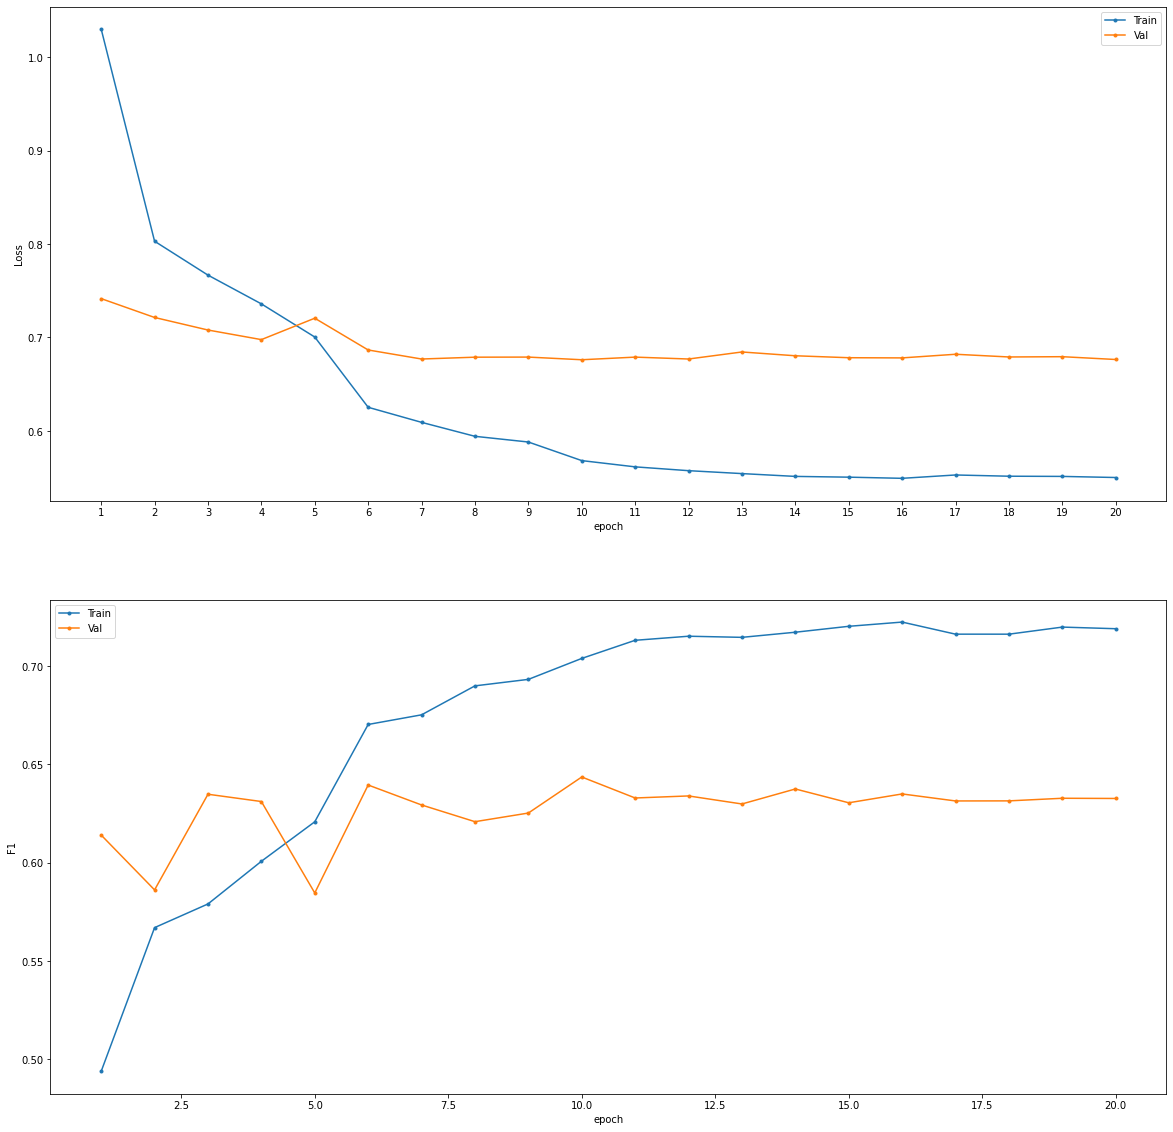

In [6]:
trainer.train(model=model, train_set=train_set, dev_set=dev_set, device=device, epochs=epochs, batch_size=batch_size, 
              data_name=data_name, model_name=model_name + '_' + str(seed))

### Test

In [7]:
if model_name == 'TextRCNN':
    model = TextRCNN(w2v_model.E).to(device)
elif model_name == 'BiLSTM_Att':
    model = LSTMATT(w2v_model.E).to(device)
elif model_name == 'TextCNN':
    model = TextCNN(w2v_model.E).to(device)
elif model_name == 'BiLSTM':
    model = BiLSTM(w2v_model.E).to(device)

model.load_state_dict(torch.load("./model_params/" + data_name + "_" + model_name + "_" + str(seed) + "_10.model", map_location=device))
model.eval()

TextCNN(
  (E): Embedding(14356, 200)
  (convs): Conv1d(
    (convs): ModuleList(
      (0): Conv1d(200, 200, kernel_size=(1,), stride=(1,))
      (1): Conv1d(200, 200, kernel_size=(2,), stride=(1,))
      (2): Conv1d(200, 200, kernel_size=(3,), stride=(1,))
      (3): Conv1d(200, 200, kernel_size=(4,), stride=(1,))
      (4): Conv1d(200, 200, kernel_size=(5,), stride=(1,))
    )
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=1000, out_features=3, bias=True)
)

In [8]:
trainer.test(model, test_set, batch_size=batch_size, device=device)

testing: 100%|████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 183.82it/s]

Precision: 0.6378241294224901
Recall: 0.6312401710401476
F1-score: 0.6243662669997202
Accuracy: 0.6924715909090909
